In [10]:
from keras.models import Model, Sequential
from keras import models
import cv2
import numpy as np
from glob import glob
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.applications import xception

In [4]:
model_path = '../output/model/model_08_09_2022_19_25_01.h5'
model = models.load_model(model_path)
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [5]:
# function to get an image
def read_img(filepath, size,folder):
    path =os.path.join(folder, filepath);
    #print(f"filepath passed is: {filepath} and full path is: {path}")
    img = image.load_img(path, target_size=size)
    #convert image to array
    img = image.img_to_array(img)
    return img

image path is: 0349.jpg
image path is: ../input/val/crack\0349.jpg
shape of img is: (255, 255, 3)


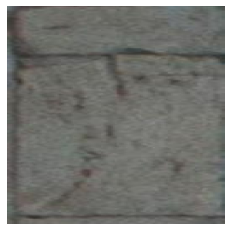

1/1 [==============================] - 4s 4s/step
shape of extract is: (1, 2048)
[0. 0. 1. 0.] 
[2]
['intact']


In [27]:
categories = ['crack', 'efflorescence', 'intact','spalling']
val_crack_folder = '../input/val/crack'
val_efflorescence_folder = '../input/val/efflorescence'
val_intact_folder = '../input/val/intact'
val_spalling_folder = '../input/val/spalling'

random_image_dir = val_crack_folder
import os, random
image_path=random.choice(os.listdir(random_image_dir))


print(f"image path is: {image_path}")
image_path=os.path.join(random_image_dir, image_path);
print(f"image path is: {image_path}")

img = image.load_img(image_path, target_size=(255,255))
#convert image to array
img = image.img_to_array(img)

print(f"shape of img is: {img.shape}")
plt.imshow(img/255)                           
plt.axis('off')
plt.show()
img = xception.preprocess_input(np.expand_dims(img, axis=0))
xception_bf = xception.Xception(weights='imagenet', include_top=False, pooling='avg')
img = xception_bf.predict(img, batch_size=32, verbose=1)
#bf_train_val = xception_bf.predict(train_val, batch_size=32, verbose=1)
print(f"shape of extract is: {img.shape}")
res = model.predict(img)
for x in res:
    print(f"{x} ")
classes = np.argmax(model.predict(img), axis = -1)

print(classes)

names = [categories[i] for i in classes]

print(names)